In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Greenhouse Plant Growth Metrics.csv")

In [3]:
df.head()

,Random,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [4]:
df.dtypes

Random     object
ACHP      float64
PHR       float64
AWWGV     float64
ALAP      float64
ANPL      float64
ARD       float64
ADWR      float64
PDMVG     float64
ARL       float64
AWWR      float64
ADWV      float64
PDMRG     float64
Class      object
dtype: object

In [5]:
df.isnull().sum()

Random    0
ACHP      0
PHR       0
AWWGV     0
ALAP      0
ANPL      0
ARD       0
ADWR      0
PDMVG     0
ARL       0
AWWR      0
ADWV      0
PDMRG     0
Class     0
dtype: int64

In [6]:
df.drop('Random', axis=1)

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG,Class
0,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,46.400873,50.830830,0.883813,744.310093,4.012024,17.796293,1.085930,12.812881,18.457811,3.264946,0.108366,33.343799,TC
29996,46.395047,50.838058,0.900390,744.307234,4.011764,17.809462,1.108226,12.822240,18.457313,3.259574,0.129387,33.338906,TC
29997,32.707725,37.065408,0.909055,857.849380,2.992712,18.200984,0.903880,8.050019,19.070005,3.495121,0.056698,26.041147,TC
29998,38.624079,37.876323,1.077557,948.663424,4.002284,15.733098,1.238818,11.953827,19.164418,3.141850,0.116892,39.125346,TC


In [7]:
df.describe()

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,1063.639833,3.944789,16.285792,1.000981,22.674553,18.071061,2.907011,0.292094,34.922184
std,4.441682,11.985213,0.245989,260.712823,0.702537,2.882793,0.456292,9.571091,2.932830,1.361928,0.151516,7.998132
min,32.664004,37.020398,0.848351,658.488225,2.959173,11.075737,0.241972,8.021505,12.359924,1.126715,0.038210,23.632527
25%,34.399604,51.059436,1.064865,875.501356,3.013099,13.933350,0.675892,14.980983,15.600294,1.911408,0.185512,28.650713
50%,36.575753,55.912058,1.211328,1009.249081,3.998577,16.248496,0.833799,21.954006,18.477019,2.818611,0.246454,33.372665
75%,42.300836,67.069465,1.501692,1243.866525,4.015829,18.202577,1.313504,27.711471,20.365252,3.254133,0.407858,39.137224
max,46.431668,77.040610,1.775383,1751.031654,5.037358,23.325870,2.196556,43.660373,23.253049,6.908923,0.687470,57.672004


In [34]:
corr_df = df[['ACHP', 'PHR', 'AWWGV', 'ALAP', 'ANPL', 'ARD', 'ADWR', 'PDMVG', 'ARL', 'AWWR', 'ADWV', 'PDMRG']].corr()
corr_df

,ACHP,PHR,AWWGV,ALAP,ANPL,ARD,ADWR,PDMVG,ARL,AWWR,ADWV,PDMRG
ACHP,1.000000,-0.013622,0.427460,-0.401833,-0.385251,-0.415854,-0.379075,-0.120607,-0.592119,-0.376681,0.115942,0.000107
PHR,-0.013622,1.000000,0.493050,0.635731,0.090495,-0.087562,-0.052952,0.514732,0.202433,0.006415,0.573550,-0.088112
AWWGV,0.427460,0.493050,1.000000,0.266280,-0.104903,-0.166862,-0.096338,0.393870,-0.215712,-0.059155,0.701240,0.000532
ALAP,-0.401833,0.635731,0.266280,1.000000,0.404359,0.326802,0.399542,0.391506,0.604169,0.419564,0.366951,-0.007883
ANPL,-0.385251,0.090495,-0.104903,0.404359,1.000000,0.512514,0.778143,0.141591,0.537721,0.528448,-0.002440,0.555486
ARD,-0.415854,-0.087562,-0.166862,0.326802,0.512514,1.000000,0.833025,-0.116574,0.722004,0.963054,-0.168133,-0.144971
ADWR,-0.379075,-0.052952,-0.096338,0.399542,0.778143,0.833025,1.000000,-0.187510,0.705628,0.876905,-0.218848,0.344392
PDMVG,-0.120607,0.514732,0.393870,0.391506,0.141591,-0.116574,-0.187510,1.000000,-0.102200,-0.195834,0.913545,0.032238
ARL,-0.592119,0.202433,-0.215712,0.604169,0.537721,0.722004,0.705628,-0.102200,1.000000,0.771567,-0.183255,-0.110905
AWWR,-0.376681,0.006415,-0.059155,0.419564,0.528448,0.963054,0.876905,-0.195834,0.771567,1.000000,-0.196339,-0.131328


In [35]:
positive_corr = corr_df.unstack()
positive_corr = positive_corr[(positive_corr > 0) & (positive_corr < 1)]

positive_corr

ACHP   AWWGV    0.427460
       ADWV     0.115942
       PDMRG    0.000107
PHR    AWWGV    0.493050
       ALAP     0.635731
                  ...   
PDMRG  AWWGV    0.000532
       ANPL     0.555486
       ADWR     0.344392
       PDMVG    0.032238
       ADWV     0.004696
Length: 74, dtype: float64

In [9]:
#ACPH Average chlorophyll content per plant, an indicator of photosynthetic activity.
#PHR Plant height rate – measures the vertical growth over time.
#AWWGV Average wet weight of vegetative growth – total fresh weight of the above-ground parts.
#ALAP Average leaf area per plant – surface area of leaves which impacts photosynthesis.
#ANPL Average number of leaves per plant – indicates plant maturity and foliage density.
#ARD Average root diameter – thickness of roots, relevant to nutrient uptake.
#ADWR Average dry weight of roots – total root biomass after drying.
#PDMVG Percentage of dry matter in vegetative growth – measures solid content in shoots.
#ARL Average root length – indicates root development and depth.
#AWWR Average wet weight of roots – total fresh root weight.
#ADWV Average dry weight of vegetative parts – dried mass of above-ground plant parts.
#PDMRG Percentage of dry matter in root growth – solid content of the root system.

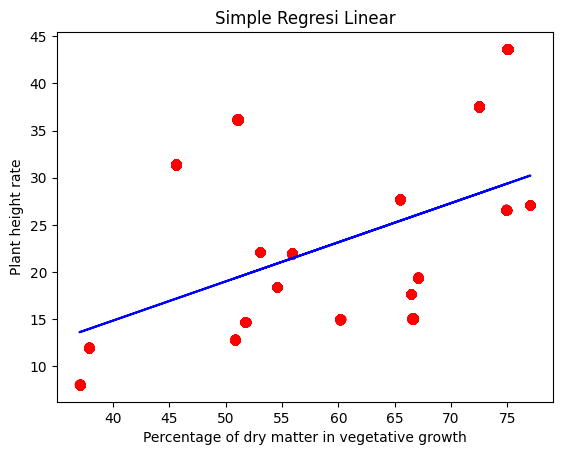

Mean Squared Error: 66.58046457870817
Root Mean Squared Error: 8.159685323510226


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df[['PHR']]
y = df[['PDMVG']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

plt.scatter(X_test, y_test, color="red")
plt.plot(X_test, y_pred, color="blue")
plt.title("Simple Regresi Linear")
plt.xlabel("Percentage of dry matter in vegetative growth")
plt.ylabel("Plant height rate")
plt.show()

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

In [44]:
X = df[['AWWGV', 'ADWV', 'PDMRG', 'PDMRG']]
y = df[['ACHP']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
lm1 = LinearRegression()
lm1.fit(X, y)
y_pred = lm1.predict(X)

In [45]:
coeff = lm1.coef_
intercept = lm1.intercept_
print(f"Coefficient: {coeff}")
print(f"Interception: {intercept}")

Coefficient: [[ 1.22976702e+01 -1.06019686e+01  4.00633455e-04  4.00633455e-04]]
Interception: [25.79100774]


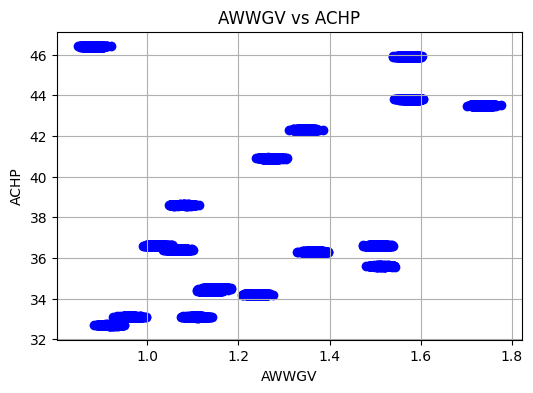

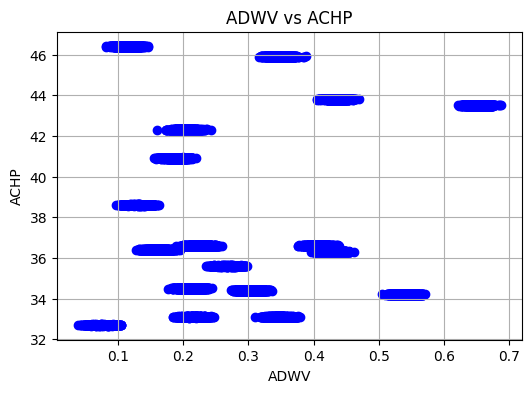

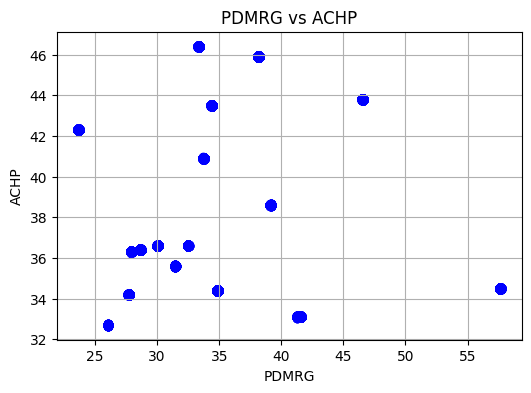

R² Score: 0.46466826524381144
Mean Squared Error: 10.588181954110047
Root Mean Squared Error: 3.2539486710933296


In [55]:
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = ['AWWGV', 'ADWV', 'PDMRG']
target = 'ACHP'

for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[feature], df[target], color='blue')
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

r2 = r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R² Score:", r2)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")